In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# reading data

train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [ ]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Processing Data

In [ ]:
# checking for nan values/ missing values
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [ ]:
# filling nan values with mean values for 'AGE'

train_data['Age'].fillna(int(train_data['Age'].mean()), inplace=True)
test_data['Age'].fillna(int(test_data['Age'].mean()), inplace=True)

# for column['Embarked'] --> filling wit hmost frequent values
train_data['Embarked'].fillna(train_data['Embarked'].value_counts().index[0], inplace=True)

In [ ]:
# clearing the data --> removing columns with NAN values and strings as values

train_data.drop(['Name', 'Ticket', 'Fare', 'Cabin'], axis=1, inplace=True)
test_data.drop(['Name', 'Ticket', 'Fare', 'Cabin'], axis=1, inplace=True)

In [ ]:
# rearranging columns of train_data

cols = train_data.columns.tolist()
cols = cols[:1] + cols[2:]+ cols[1:2]
train_data = train_data[cols]

In [ ]:
#converting to numerical data

from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()

test_data.iloc[:, 2] = lb.fit_transform(test_data.iloc[:,2])
train_data.iloc[:, 2] = lb.fit_transform(train_data.iloc[:,2])

train_data.iloc[:, -2] = lb.fit_transform(train_data.iloc[:,-2])
test_data.iloc[:, -1] = lb.fit_transform(test_data.iloc[:,-1])

In [ ]:
train_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked,Survived
0,1,3,1,22.0,1,0,2,0
1,2,1,0,38.0,1,0,0,1
2,3,3,0,26.0,0,0,2,1
3,4,1,0,35.0,1,0,2,1
4,5,3,1,35.0,0,0,2,0
...,...,...,...,...,...,...,...,...
886,887,2,1,27.0,0,0,2,0
887,888,1,0,19.0,0,0,2,1
888,889,3,0,29.0,1,2,2,0
889,890,1,1,26.0,0,0,0,1


In [ ]:
test_data

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Embarked
0,892,3,1,34.5,0,0,1
1,893,3,0,47.0,1,0,2
2,894,2,1,62.0,0,0,1
3,895,3,1,27.0,0,0,2
4,896,3,0,22.0,1,1,2
...,...,...,...,...,...,...,...
413,1305,3,1,30.0,0,0,2
414,1306,1,0,39.0,0,0,0
415,1307,3,1,38.5,0,0,2
416,1308,3,1,30.0,0,0,2


# Neural Network - Training and Evaluation

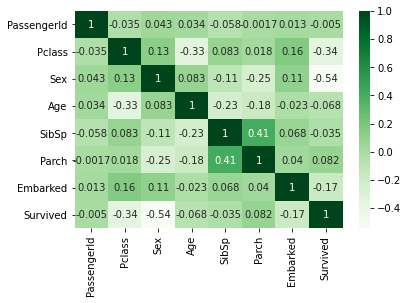

In [ ]:
# Analysing Data

sns.heatmap(train_data.corr(), annot=True, cmap='Greens')
plt.show()

In [ ]:
# splitting data

X_train = train_data.iloc[:, :7]  # input features
Y_train = train_data.iloc[:, 7]  #output

In [ ]:
# normalising data

from sklearn.preprocessing import StandardScaler

sdc = StandardScaler()
X_train = sdc.fit_transform(X_train)
X_test = sdc.fit_transform(test_data)

In [ ]:
#setting architecture

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras import regularizers

#setting layers

# dropout selected via trial and error between values [0.2-0.5] to maximise accuracy on kaggle dataset  
# regularizers used to avoid overfitting
model = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

# setting metrics
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# providing training data to model            
model.fit(X_train, Y_train, batch_size=30, epochs=100)

Epoch 1/100
30/30 [==============================] - 25s 44ms/step - loss: 21.8062 - accuracy: 0.6839
Epoch 2/100
30/30 [==============================] - 1s 44ms/step - loss: 3.2514 - accuracy: 0.8098
Epoch 3/100
30/30 [==============================] - 1s 42ms/step - loss: 0.7762 - accuracy: 0.8232
Epoch 4/100
30/30 [==============================] - 1s 44ms/step - loss: 0.5899 - accuracy: 0.8366
Epoch 5/100
30/30 [==============================] - 1s 44ms/step - loss: 0.5585 - accuracy: 0.8341
Epoch 6/100
30/30 [==============================] - 1s 44ms/step - loss: 0.5517 - accuracy: 0.8410
Epoch 7/100
30/30 [==============================] - 1s 43ms/step - loss: 0.5554 - accuracy: 0.8042
Epoch 8/100
30/30 [==============================] - 1s 44ms/step - loss: 0.5614 - accuracy: 0.8094
Epoch 9/100
30/30 [==============================] - 1s 44ms/step - loss: 0.5503 - accuracy: 0.8308
Epoch 10/100
30/30 [==============================] - 1s 44ms/step - loss: 0.5330 - accuracy: 0.83

In [ ]:
model.evaluate(X_train, Y_train)

28/28 [==============================] - 1s 12ms/step - loss: 0.4985 - accuracy: 0.8328


[0.4985477924346924, 0.8327721953392029]

# Prediction for Dataset

In [ ]:
prediction = model.predict(X_test).tolist()

In [ ]:
arr = []
for val in prediction:
    if val[0] >= 0.45:
        arr.append(1)
    else:
        arr.append(0)

In [ ]:
# final result
print(arr)

[0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 

In [ ]:
# submitting on kaggle --> EXTRAS

submission = pd.DataFrame({'PassengerId':test_data['PassengerId'],'Survived':arr})
submission

# saving file
filename = 'predictTitanic.csv'
submission.to_csv(filename,index=False)
print('Saved file: ' + filename)

Saved file: predictTitanic.csv


# Visualisation

In [ ]:
!pip3 install ann_visualizer
!pip install graphviz

from ann_visualizer.visualize import ann_viz  
ann_viz(model, title="neural network")

# the file for my implemented neural network
# is now available as--> network.gv.pdf

  Created wheel for ann-visualizer: filename=ann_visualizer-2.5-cp37-none-any.whl size=4168 sha256=a452a1263d0b1a3b6ab729b1cfc650b4f466a91354deb814b4df7cb0a8dc5825
  Stored in directory: /root/.cache/pip/wheels/b6/b4/4e/d92f50c9c4f004cf315a0e0fcd455486bd799c50fe80cf1f5d
Successfully built ann-visualizer
